In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

## Reading Admissions File and creating dataframe

In [2]:
Admissions = pd.read_csv('Admissions Data for Technical Evaluation.csv')
Admissions.head()

,StudentID,EntryTermUse,CollegeCodeUse,IsApplicantUse,IsOfferedUse,IsEnrolledUse,StandardizedTestScore1600New,HighSchoolGPAUse,ProfileStatusUse,NeedAidEligibleDescUse,EstimatedFamilyContribuitionUse,FinancialNeedUse,RUCCDescriptionUse,DrexelWebHits,GenderDesc,Tuition
0,1,Fall 2018,College B,1,1,0,1510.0,3.683214,Did not file,Did Not Successfully File Aid Forms,0,70000,Metro - 1 million +,36.0,Male,55000
1,2,Fall 2020,College E,1,1,0,NaN,2.550000,Did not file,Did Not Successfully File Aid Forms,1284,68716,Metro - 1 million +,12.0,Male,55000
2,3,Fall 2019,College E,1,0,0,1410.0,3.562334,"Filed, has financial need",Successfully Filed Aid Forms,37703,32297,Metro - 1 million +,307.0,Male,55000
3,4,Fall 2017,College F,1,0,0,1000.0,2.930000,"Filed, has financial need",Successfully Filed Aid Forms,113885,0,Metro - 1 million +,0.0,Female,55000
4,5,Fall 2021,College C,1,1,0,1210.0,3.298974,"Filed, has financial need",Successfully Filed Aid Forms,8550,61450,Metro - 1 million +,0.0,Male,55000


In [3]:
# Checking dataframe to see if there are any missing values
Admissions.iloc[:,:].isnull().values.any()

True

In [4]:
# For any NA, replacing with blank
Admissions = Admissions.fillna('')
Admissions.head()

,StudentID,EntryTermUse,CollegeCodeUse,IsApplicantUse,IsOfferedUse,IsEnrolledUse,StandardizedTestScore1600New,HighSchoolGPAUse,ProfileStatusUse,NeedAidEligibleDescUse,EstimatedFamilyContribuitionUse,FinancialNeedUse,RUCCDescriptionUse,DrexelWebHits,GenderDesc,Tuition
0,1,Fall 2018,College B,1,1,0,1510,3.683214,Did not file,Did Not Successfully File Aid Forms,0,70000,Metro - 1 million +,36,Male,55000
1,2,Fall 2020,College E,1,1,0,,2.550000,Did not file,Did Not Successfully File Aid Forms,1284,68716,Metro - 1 million +,12,Male,55000
2,3,Fall 2019,College E,1,0,0,1410,3.562334,"Filed, has financial need",Successfully Filed Aid Forms,37703,32297,Metro - 1 million +,307,Male,55000
3,4,Fall 2017,College F,1,0,0,1000,2.930000,"Filed, has financial need",Successfully Filed Aid Forms,113885,0,Metro - 1 million +,0,Female,55000
4,5,Fall 2021,College C,1,1,0,1210,3.298974,"Filed, has financial need",Successfully Filed Aid Forms,8550,61450,Metro - 1 million +,0,Male,55000


In [5]:
# Checking dataframe to see if there are any missing values
Admissions.iloc[:,:].isnull().values.any()

False

In [6]:
Admissions.dtypes

StudentID                            int64
EntryTermUse                        object
CollegeCodeUse                      object
IsApplicantUse                       int64
IsOfferedUse                         int64
IsEnrolledUse                        int64
StandardizedTestScore1600New        object
HighSchoolGPAUse                   float64
ProfileStatusUse                    object
NeedAidEligibleDescUse              object
EstimatedFamilyContribuitionUse      int64
FinancialNeedUse                     int64
RUCCDescriptionUse                  object
DrexelWebHits                       object
GenderDesc                          object
Tuition                              int64
dtype: object

In [7]:
Admissions.columns

Index(['StudentID', 'EntryTermUse', 'CollegeCodeUse', 'IsApplicantUse',
       'IsOfferedUse', 'IsEnrolledUse', 'StandardizedTestScore1600New',
       'HighSchoolGPAUse', 'ProfileStatusUse', 'NeedAidEligibleDescUse',
       'EstimatedFamilyContribuitionUse', 'FinancialNeedUse',
       'RUCCDescriptionUse', 'DrexelWebHits', 'GenderDesc', 'Tuition'],
      dtype='object')

In [8]:
# Method 1: Listing all duplicates in dataframe
duplicates = Admissions[Admissions.duplicated(keep=False)]
duplicates

,StudentID,EntryTermUse,CollegeCodeUse,IsApplicantUse,IsOfferedUse,IsEnrolledUse,StandardizedTestScore1600New,HighSchoolGPAUse,ProfileStatusUse,NeedAidEligibleDescUse,EstimatedFamilyContribuitionUse,FinancialNeedUse,RUCCDescriptionUse,DrexelWebHits,GenderDesc,Tuition
2590,2592,Fall 2018,College C,1,0,0,1000,3.31,Did not file,Did Not Successfully File Aid Forms,37821,32179,Metro - 1 million +,0,Female,55000
79999,2592,Fall 2018,College C,1,0,0,1000,3.31,Did not file,Did Not Successfully File Aid Forms,37821,32179,Metro - 1 million +,0,Female,55000


In [9]:
student_id_count = Admissions['StudentID'].count()
student_id_count

80000

In [10]:
# Viewing count of Unique Student ID. 
student_id_unique = len(Admissions['StudentID'].unique())
student_id_unique

79999

In [11]:
# Method 2: Creating a copy of the Admissions dataframe.
# Adding Count column after grouping by StudentID
Admissions_copy = Admissions.copy()
Admissions_copy['count'] = Admissions_copy.groupby('StudentID')['StudentID'].transform('count')
Admissions_copy.head()

,StudentID,EntryTermUse,CollegeCodeUse,IsApplicantUse,IsOfferedUse,IsEnrolledUse,StandardizedTestScore1600New,HighSchoolGPAUse,ProfileStatusUse,NeedAidEligibleDescUse,EstimatedFamilyContribuitionUse,FinancialNeedUse,RUCCDescriptionUse,DrexelWebHits,GenderDesc,Tuition,count
0,1,Fall 2018,College B,1,1,0,1510,3.683214,Did not file,Did Not Successfully File Aid Forms,0,70000,Metro - 1 million +,36,Male,55000,1
1,2,Fall 2020,College E,1,1,0,,2.550000,Did not file,Did Not Successfully File Aid Forms,1284,68716,Metro - 1 million +,12,Male,55000,1
2,3,Fall 2019,College E,1,0,0,1410,3.562334,"Filed, has financial need",Successfully Filed Aid Forms,37703,32297,Metro - 1 million +,307,Male,55000,1
3,4,Fall 2017,College F,1,0,0,1000,2.930000,"Filed, has financial need",Successfully Filed Aid Forms,113885,0,Metro - 1 million +,0,Female,55000,1
4,5,Fall 2021,College C,1,1,0,1210,3.298974,"Filed, has financial need",Successfully Filed Aid Forms,8550,61450,Metro - 1 million +,0,Male,55000,1


In [12]:
# Viewing StudentID that appears more than once
Admissions_duplicates = Admissions_copy.loc[Admissions_copy['count'] > 1].sort_values(by=['StudentID'])
Admissions_duplicates

,StudentID,EntryTermUse,CollegeCodeUse,IsApplicantUse,IsOfferedUse,IsEnrolledUse,StandardizedTestScore1600New,HighSchoolGPAUse,ProfileStatusUse,NeedAidEligibleDescUse,EstimatedFamilyContribuitionUse,FinancialNeedUse,RUCCDescriptionUse,DrexelWebHits,GenderDesc,Tuition,count
2590,2592,Fall 2018,College C,1,0,0,1000,3.31,Did not file,Did Not Successfully File Aid Forms,37821,32179,Metro - 1 million +,0,Female,55000,2
79999,2592,Fall 2018,College C,1,0,0,1000,3.31,Did not file,Did Not Successfully File Aid Forms,37821,32179,Metro - 1 million +,0,Female,55000,2


In [13]:
# Dropping duplicates and counting unique StudentID
Admissions = Admissions.drop_duplicates(subset='StudentID')
len(Admissions)

79999

## Reading Financial Aid File and creating dataframe

In [14]:
FinancialAid = pd.read_csv('Financial Aid Data for Technical Evaluation.csv')
FinancialAid.head()

,StudentID,EntryTermUse,AidType,value
0,1,Fall 2018,AidMeritBased,16400
1,1,Fall 2018,AidNeedBased,0
2,2,Fall 2020,AidMeritBased,0
3,2,Fall 2020,AidNeedBased,0
4,3,Fall 2019,AidMeritBased,0


In [15]:
# Checking dataframe to see if there are any missing values
FinancialAid.iloc[:,:].isnull().values.any()

False

In [16]:
FinancialAid.columns

Index(['StudentID', 'EntryTermUse', 'AidType', 'value'], dtype='object')

In [17]:
#Changing the datatypes
#FinancialAid['value'] = FinancialAid['value'].astype(float).map('{:,.0f}'.format)
#FinancialAid.head()

In [18]:
# Creating new dataframe and using pivot method
FinancialAid_updated = FinancialAid.pivot(index = 'StudentID', columns = 'AidType', values = 'value')
FinancialAid_updated.head()

AidType,AidMeritBased,AidNeedBased
StudentID,,
1,16400,0
2,0,0
3,0,0
4,0,0
5,13800,30000


In [19]:
# Resetting Index
FinancialAid_updated = FinancialAid_updated.reset_index()
FinancialAid_updated = FinancialAid_updated[['StudentID','AidMeritBased','AidNeedBased']]
FinancialAid_updated.head()

AidType,StudentID,AidMeritBased,AidNeedBased
0,1,16400,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,13800,30000


## Merging the Two DataFrames

In [20]:
Admissions_FinancialAid = pd.merge(Admissions, FinancialAid_updated, on=['StudentID'], how = 'inner')
Admissions_FinancialAid.head()

,StudentID,EntryTermUse,CollegeCodeUse,IsApplicantUse,IsOfferedUse,IsEnrolledUse,StandardizedTestScore1600New,HighSchoolGPAUse,ProfileStatusUse,NeedAidEligibleDescUse,EstimatedFamilyContribuitionUse,FinancialNeedUse,RUCCDescriptionUse,DrexelWebHits,GenderDesc,Tuition,AidMeritBased,AidNeedBased
0,1,Fall 2018,College B,1,1,0,1510,3.683214,Did not file,Did Not Successfully File Aid Forms,0,70000,Metro - 1 million +,36,Male,55000,16400,0
1,2,Fall 2020,College E,1,1,0,,2.550000,Did not file,Did Not Successfully File Aid Forms,1284,68716,Metro - 1 million +,12,Male,55000,0,0
2,3,Fall 2019,College E,1,0,0,1410,3.562334,"Filed, has financial need",Successfully Filed Aid Forms,37703,32297,Metro - 1 million +,307,Male,55000,0,0
3,4,Fall 2017,College F,1,0,0,1000,2.930000,"Filed, has financial need",Successfully Filed Aid Forms,113885,0,Metro - 1 million +,0,Female,55000,0,0
4,5,Fall 2021,College C,1,1,0,1210,3.298974,"Filed, has financial need",Successfully Filed Aid Forms,8550,61450,Metro - 1 million +,0,Male,55000,13800,30000


In [21]:
# Counting number of records
len(Admissions_FinancialAid)

79999

In [22]:
#datatypes
Admissions_FinancialAid.dtypes

StudentID                            int64
EntryTermUse                        object
CollegeCodeUse                      object
IsApplicantUse                       int64
IsOfferedUse                         int64
IsEnrolledUse                        int64
StandardizedTestScore1600New        object
HighSchoolGPAUse                   float64
ProfileStatusUse                    object
NeedAidEligibleDescUse              object
EstimatedFamilyContribuitionUse      int64
FinancialNeedUse                     int64
RUCCDescriptionUse                  object
DrexelWebHits                       object
GenderDesc                          object
Tuition                              int64
AidMeritBased                        int64
AidNeedBased                         int64
dtype: object

## Data Visualization

### Bar Plots and Pie Charts

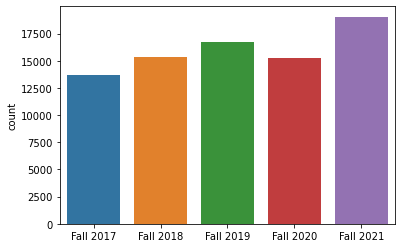

In [23]:
#Entry Term Use Bar Plot
sns.countplot(sorted(Admissions_FinancialAid['EntryTermUse'], reverse = False))
plt.show()
#plt.rcParams['figure.figsize'] = [10,6]

23.805297911167145
20.951512455940247
19.15023922920227
19.035238027572632
17.057713866233826


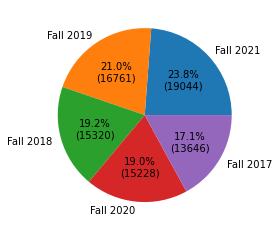

In [24]:
#Entry Term Use Per Total Student Applications Pie Chart
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

values = Admissions_FinancialAid.EntryTermUse
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=False)
plt.rcParams['figure.figsize'] = [10,6]

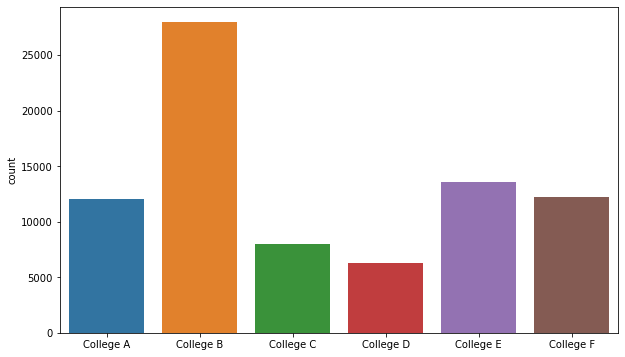

In [25]:
#College Code per Student Application Bar Plot
sns.countplot(sorted(Admissions_FinancialAid['CollegeCodeUse'], reverse = False))
plt.show()
#plt.rcParams['figure.figsize'] = [10,6]

34.93543565273285
16.971461474895477
15.28519093990326
14.992687106132507
9.973874688148499
7.841347903013229


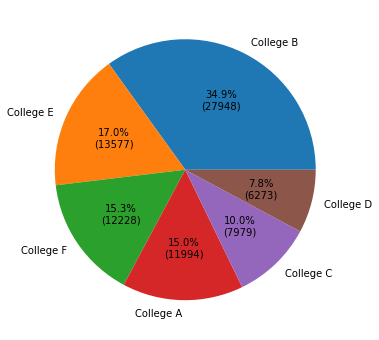

In [26]:
#College Code Use Per Student Applications Pie Chart
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

values = Admissions_FinancialAid.CollegeCodeUse
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=False)
plt.rcParams['figure.figsize'] = [10,6]

55.383193492889404
44.616806507110596


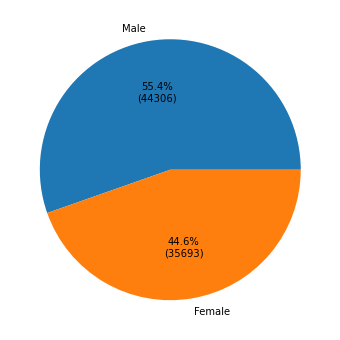

In [27]:
#Gender Description Per Total Student Applications Pie Chart
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

values = Admissions_FinancialAid.GenderDesc
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=False)
plt.rcParams['figure.figsize'] = [10,6]

84.84981060028076
12.105151265859604
3.0450381338596344


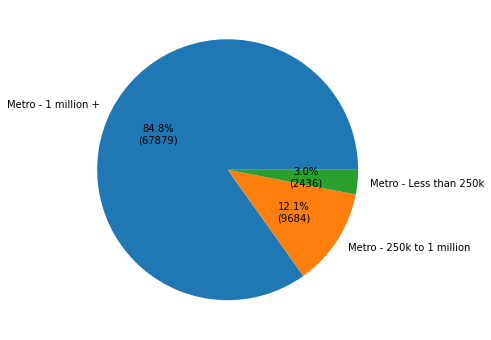

In [28]:
#Rural-Urban Continuum Codes (RUCCDescriptionUse) per Student Applications Pie Chart
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

values = Admissions_FinancialAid.RUCCDescriptionUse
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=False)
plt.rcParams['figure.figsize'] = [10,6]

55.26694059371948
44.73305940628052


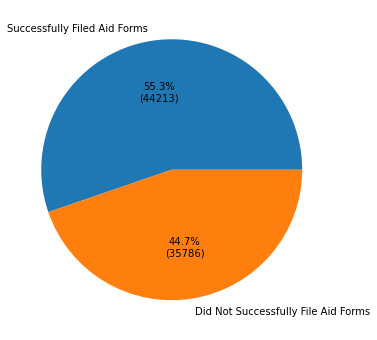

In [29]:
#Aid Forms Application Success Status per Student Applications Pie Chart
def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

values = Admissions_FinancialAid.NeedAidEligibleDescUse
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=False)
plt.rcParams['figure.figsize'] = [10,6]

### Admission Status per College Crosstabs

In [30]:
# Admission Status per College Contingency Table
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['College'], colnames = ['Admission Status'], margins = True)

Admission Status,0,1,All
College,,,
College A,4285,7709,11994
College B,13231,14717,27948
College C,2269,5710,7979
College D,2433,3840,6273
College E,5278,8299,13577
College F,5610,6618,12228
All,33106,46893,79999


In [31]:
# Admission Status per College Contingency Table (College Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['College'], colnames = ['Admission Status'],
normalize = 'index', margins = True).round(4)*100

Admission Status,0,1
College,,
College A,35.73,64.27
College B,47.34,52.66
College C,28.44,71.56
College D,38.79,61.21
College E,38.87,61.13
College F,45.88,54.12
All,41.38,58.62


In [32]:
# Admission Status per College Contingency Table (Admission Status Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['College'], colnames = ['Admission Status'], 
normalize = 'columns', margins = True).round(4)*100

Admission Status,0,1,All
College,,,
College A,12.94,16.44,14.99
College B,39.97,31.38,34.94
College C,6.85,12.18,9.97
College D,7.35,8.19,7.84
College E,15.94,17.70,16.97
College F,16.95,14.11,15.29


In [33]:
# Admission Status per College Contingency Table (Overall Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['College'], colnames = ['Admission Status'], 
normalize = 'all', margins = True).round(4)*100

Admission Status,0,1,All
College,,,
College A,5.36,9.64,14.99
College B,16.54,18.40,34.94
College C,2.84,7.14,9.97
College D,3.04,4.80,7.84
College E,6.60,10.37,16.97
College F,7.01,8.27,15.29
All,41.38,58.62,100.00


### Enrollment Status per College Crosstabs

In [34]:
# Enrollment Status per College Contingency Table
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['College'], colnames = ['Enrollment Status'], margins = True)

Enrollment Status,0,1,All
College,,,
College A,10581,1413,11994
College B,24661,3287,27948
College C,7139,840,7979
College D,5242,1031,6273
College E,11162,2415,13577
College F,11308,920,12228
All,70093,9906,79999


In [35]:
# Enrollment Status per College Contingency Table (College Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['College'], colnames = ['Enrollment Status'], 
normalize = 'index', margins = True).round(4)*100

Enrollment Status,0,1
College,,
College A,88.22,11.78
College B,88.24,11.76
College C,89.47,10.53
College D,83.56,16.44
College E,82.21,17.79
College F,92.48,7.52
All,87.62,12.38


In [36]:
# Enrollment Status per College Contingency Table (Enrollment Status Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['College'], colnames = ['Enrollment Status'], 
normalize = 'columns', margins = True).round(4)*100

Enrollment Status,0,1,All
College,,,
College A,15.10,14.26,14.99
College B,35.18,33.18,34.94
College C,10.19,8.48,9.97
College D,7.48,10.41,7.84
College E,15.92,24.38,16.97
College F,16.13,9.29,15.29


In [37]:
# Enrollment Status per College Contingency Table (Overall Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['College'], colnames = ['Enrollment Status'],
normalize = 'all', margins = True).round(4)*100

Enrollment Status,0,1,All
College,,,
College A,13.23,1.77,14.99
College B,30.83,4.11,34.94
College C,8.92,1.05,9.97
College D,6.55,1.29,7.84
College E,13.95,3.02,16.97
College F,14.14,1.15,15.29
All,87.62,12.38,100.00


### Admission Status per Gender Crosstabs

In [38]:
# Admission Status per Gender Contingency Table
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['Gender'], colnames = ['Admission Status'], margins = True)

Admission Status,0,1,All
Gender,,,
Female,14445,21248,35693
Male,18661,25645,44306
All,33106,46893,79999


In [39]:
# Admission Status per Gender Contingency Table (Gender Percentage)
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['Gender'], colnames = ['Admission Status'],
normalize = 'index', margins = True).round(4)*100

Admission Status,0,1
Gender,,
Female,40.47,59.53
Male,42.12,57.88
All,41.38,58.62


In [40]:
# Admission Status per Gender Contingency Table (Admission Status Percentage)
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['Gender'], colnames = ['Admission Status'],
normalize = 'columns', margins = True).round(4)*100

Admission Status,0,1,All
Gender,,,
Female,43.63,45.31,44.62
Male,56.37,54.69,55.38


In [41]:
# Admission Status per Gender Contingency Table (Overall Percentage)
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsOfferedUse, 
rownames = ['Gender'], colnames = ['Admission Status'],
normalize = 'all', margins = True).round(4)*100

Admission Status,0,1,All
Gender,,,
Female,18.06,26.56,44.62
Male,23.33,32.06,55.38
All,41.38,58.62,100.00


### Enrollment Status per Gender Crosstabs

In [42]:
# Enrollment Status per Gender Contingency Table
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Gender'], colnames = ['Enrollment Status'], margins = True)

Enrollment Status,0,1,All
Gender,,,
Female,31043,4650,35693
Male,39050,5256,44306
All,70093,9906,79999


In [43]:
# Enrollment Status per Gender Contingency Table (Gender Percentage)
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Gender'], colnames = ['Enrollment Status'], 
normalize = 'index', margins = True).round(4)*100

Enrollment Status,0,1
Gender,,
Female,86.97,13.03
Male,88.14,11.86
All,87.62,12.38


In [44]:
# Enrollment Status per Gender Contingency Table (Enrollment Status Percentage)
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Gender'], colnames = ['Enrollment Status'], 
normalize = 'columns', margins = True).round(4)*100

Enrollment Status,0,1,All
Gender,,,
Female,44.29,46.94,44.62
Male,55.71,53.06,55.38


In [45]:
# Enrollment Status per Gender Contingency Table (Overall Percentage)
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Gender'], colnames = ['Enrollment Status'],
normalize = 'all', margins = True).round(4)*100

Enrollment Status,0,1,All
Gender,,,
Female,38.80,5.81,44.62
Male,48.81,6.57,55.38
All,87.62,12.38,100.00


### Enrollment per Admission Crosstabs

In [46]:
# Admissions and Enrollment Contingency Table
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Admission Status'], colnames = ['Enrollment Status'], margins = True)

Enrollment Status,0,1,All
Admission Status,,,
0,33106,0,33106
1,36987,9906,46893
All,70093,9906,79999


In [47]:
# Admissions and Enrollment Contingency Table (Admissions Percentage)
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Admission Status'], colnames = ['Enrollment Status'], 
normalize = 'index', margins = True).round(4)*100

Enrollment Status,0,1
Admission Status,,
0,100.00,0.00
1,78.88,21.12
All,87.62,12.38


In [48]:
# Admissions and Enrollment Contingency Table (Enrollment Percentage)
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Admission Status'], colnames = ['Enrollment Status'], 
normalize = 'columns', margins = True).round(4)*100

Enrollment Status,0,1,All
Admission Status,,,
0,47.23,0.0,41.38
1,52.77,100.0,58.62


In [49]:
# Admissions and Enrollment Contingency Table (Admissions Percentage)
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
rownames = ['Admission Status'], colnames = ['Enrollment Status'], 
normalize = 'all', margins = True).round(4)*100

Enrollment Status,0,1,All
Admission Status,,,
0,41.38,0.00,41.38
1,46.23,12.38,58.62
All,87.62,12.38,100.00


### Gender Status per College Crosstabs

In [50]:
# Gender per College Contingency Table 
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.GenderDesc, 
rownames = ['College'], colnames = ['Gender'], margins = True)

Gender,Female,Male,All
College,,,
College A,5393,6601,11994
College B,10473,17475,27948
College C,3954,4025,7979
College D,3080,3193,6273
College E,9050,4527,13577
College F,3743,8485,12228
All,35693,44306,79999


In [51]:
# Gender per College Contingency Table (College Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.GenderDesc, 
rownames = ['College'], colnames = ['Gender'], 
normalize = 'index', margins = True).round(4)*100

Gender,Female,Male
College,,
College A,44.96,55.04
College B,37.47,62.53
College C,49.56,50.44
College D,49.10,50.90
College E,66.66,33.34
College F,30.61,69.39
All,44.62,55.38


In [52]:
# Gender per College Contingency Table (Gender Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.GenderDesc, 
rownames = ['College'], colnames = ['Gender'], 
normalize = 'columns', margins = True).round(4)*100

Gender,Female,Male,All
College,,,
College A,15.11,14.90,14.99
College B,29.34,39.44,34.94
College C,11.08,9.08,9.97
College D,8.63,7.21,7.84
College E,25.36,10.22,16.97
College F,10.49,19.15,15.29


In [53]:
# Gender per College Contingency Table (Overall Percentage)
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.GenderDesc, 
rownames = ['College'], colnames = ['Gender'], 
normalize = 'all', margins = True).round(4)*100

Gender,Female,Male,All
College,,,
College A,6.74,8.25,14.99
College B,13.09,21.84,34.94
College C,4.94,5.03,9.97
College D,3.85,3.99,7.84
College E,11.31,5.66,16.97
College F,4.68,10.61,15.29
All,44.62,55.38,100.00


### Average High School GPA Crosstabs

In [54]:
#Average High School GPA per Gender Per College
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.GenderDesc, 
values = Admissions_FinancialAid.HighSchoolGPAUse,
aggfunc = 'mean', rownames = ['College'],
colnames = ['Gender'], margins = True).round(2)

Gender,Female,Male,All
College,,,
College A,3.30,3.29,3.30
College B,3.31,3.31,3.31
College C,3.27,3.26,3.26
College D,3.35,3.33,3.34
College E,3.31,3.31,3.31
College F,3.29,3.30,3.30
All,3.31,3.30,3.30


In [55]:
#Average High School GPA per Entry Term Per College
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.EntryTermUse, 
values = Admissions_FinancialAid.HighSchoolGPAUse,
aggfunc = 'mean', rownames = ['College'], 
colnames = ['Entry Term'], margins = True).round(2)

Entry Term,Fall 2017,Fall 2018,Fall 2019,Fall 2020,Fall 2021,All
College,,,,,,
College A,3.31,3.30,3.29,3.29,3.29,3.30
College B,3.31,3.31,3.31,3.33,3.31,3.31
College C,3.27,3.29,3.26,3.26,3.25,3.26
College D,3.35,3.35,3.33,3.34,3.34,3.34
College E,3.31,3.32,3.32,3.30,3.31,3.31
College F,3.30,3.29,3.29,3.30,3.29,3.30
All,3.31,3.31,3.30,3.31,3.30,3.30


In [56]:
#Average High School GPA per Admission per College
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsOfferedUse, 
values = Admissions_FinancialAid.HighSchoolGPAUse,
aggfunc = 'mean', rownames = ['College'], 
colnames = ['Admission Status'], margins = True).round(2)

Admission Status,0,1,All
College,,,
College A,3.24,3.32,3.30
College B,3.28,3.34,3.31
College C,3.19,3.29,3.26
College D,3.29,3.37,3.34
College E,3.26,3.34,3.31
College F,3.26,3.32,3.30
All,3.26,3.33,3.30


In [57]:
#Average High School GPA per Admission per Entry Term
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.EntryTermUse, 
values = Admissions_FinancialAid.HighSchoolGPAUse,
aggfunc = 'mean', rownames = ['Admission Status'], 
colnames = ['Entry Term'], margins = True).round(2)

Entry Term,Fall 2017,Fall 2018,Fall 2019,Fall 2020,Fall 2021,All
Admission Status,,,,,,
0,3.26,3.27,3.26,3.27,3.26,3.26
1,3.34,3.34,3.33,3.33,3.33,3.33
All,3.31,3.31,3.30,3.31,3.30,3.30


### Estimated Family Contribution Crosstabs

In [58]:
#Average Estimated Family Contribution per Admission per College
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsOfferedUse, 
values = Admissions_FinancialAid.EstimatedFamilyContribuitionUse,
aggfunc = 'mean', rownames = ['College'], 
colnames = ['Admission Status'], margins = True).round(0)

Admission Status,0,1,All
College,,,
College A,30445.0,29757.0,30003.0
College B,20602.0,21123.0,20876.0
College C,37127.0,34751.0,35427.0
College D,18514.0,18682.0,18617.0
College E,23847.0,25325.0,24751.0
College F,21461.0,21101.0,21266.0
All,23518.0,24742.0,24236.0


In [59]:
#Average Estimated Family Contribution per Gender per College
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.EntryTermUse, 
values = Admissions_FinancialAid.EstimatedFamilyContribuitionUse,
aggfunc = 'mean', rownames = ['Gender'], 
colnames = ['Entry Term'], margins = True).round(0)

Entry Term,Fall 2017,Fall 2018,Fall 2019,Fall 2020,Fall 2021,All
Gender,,,,,,
Female,23933.0,24627.0,23952.0,25270.0,24503.0,24463.0
Male,26749.0,25628.0,23285.0,22511.0,22765.0,24053.0
All,25497.0,25178.0,23580.0,23752.0,23539.0,24236.0


In [60]:
#Average Estimated Family Contribution per Admission per Enrollent
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
values = Admissions_FinancialAid.EstimatedFamilyContribuitionUse,
aggfunc = 'mean', rownames = ['Admission Status'], 
colnames = ['Enrollment Status'], margins = True).round(0)

Enrollment Status,0,1,All
Admission Status,,,
0,23518.0,NaN,23518.0
1,24846.0,24354.0,24742.0
All,24219.0,24354.0,24236.0


### Estimated Financial Need Crosstabs

In [61]:
#Average Estimated Financial Need Use per Admission per College
pd.crosstab(index = Admissions_FinancialAid.CollegeCodeUse, 
columns = Admissions_FinancialAid.IsOfferedUse, 
values = Admissions_FinancialAid.FinancialNeedUse,
aggfunc = 'mean', rownames = ['College'], 
colnames = ['Admission Status'], margins = True).round(0)

Admission Status,0,1,All
College,,,
College A,51945.0,51947.0,51946.0
College B,54106.0,53783.0,53936.0
College C,50727.0,51288.0,51128.0
College D,54646.0,54703.0,54681.0
College E,52765.0,52652.0,52696.0
College F,53646.0,53940.0,53805.0
All,53343.0,53075.0,53186.0


In [62]:
#Average Estimated Financial Need Use per Gender per Entry Term
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.EntryTermUse, 
values = Admissions_FinancialAid.FinancialNeedUse,
aggfunc = 'mean', rownames = ['Gender'], 
colnames = ['Entry Term'], margins = True).round(0)

Entry Term,Fall 2017,Fall 2018,Fall 2019,Fall 2020,Fall 2021,All
Gender,,,,,,
Female,53016.0,53094.0,53209.0,52967.0,52969.0,53050.0
Male,53214.0,53032.0,53304.0,53368.0,53496.0,53295.0
All,53126.0,53060.0,53262.0,53187.0,53261.0,53186.0


In [63]:
#Average Estimated Financial Need Use per Admission per Enrollent
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
values = Admissions_FinancialAid.FinancialNeedUse,
aggfunc = 'mean', rownames = ['Admission Status'], 
colnames = ['Enrollment Status'], margins = True).round(0)

Enrollment Status,0,1,All
Admission Status,,,
0,53343.0,NaN,53343.0
1,53132.0,52860.0,53075.0
All,53232.0,52860.0,53186.0


### Estimated Financial Aid Crosstabs

In [64]:
#Average Estimated Aid Merit Based Use per Gender per Entry Term
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.EntryTermUse, 
values = Admissions_FinancialAid.AidMeritBased,
aggfunc = 'mean', rownames = ['Gender'], 
colnames = ['Entry Term'], margins = True).round(0)

Entry Term,Fall 2017,Fall 2018,Fall 2019,Fall 2020,Fall 2021,All
Gender,,,,,,
Female,5532.0,5490.0,5555.0,5459.0,5387.0,5480.0
Male,5319.0,5283.0,5251.0,5308.0,5194.0,5266.0
All,5414.0,5376.0,5385.0,5376.0,5280.0,5362.0


In [65]:
#Average Estimated Aid Need Based Use per Gender per Entry Term
pd.crosstab(index = Admissions_FinancialAid.GenderDesc, 
columns = Admissions_FinancialAid.EntryTermUse, 
values = Admissions_FinancialAid.AidNeedBased,
aggfunc = 'mean', rownames = ['Gender'], 
colnames = ['Entry Term'], margins = True).round(0)

Entry Term,Fall 2017,Fall 2018,Fall 2019,Fall 2020,Fall 2021,All
Gender,,,,,,
Female,8413.0,8569.0,8817.0,8618.0,8553.0,8600.0
Male,8491.0,8358.0,8438.0,8696.0,8359.0,8462.0
All,8457.0,8453.0,8605.0,8661.0,8445.0,8523.0


In [66]:
#Average Estimated Aid Merit Based Use per Admission per Enrollment
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
values = Admissions_FinancialAid.AidMeritBased,
aggfunc = 'mean', rownames = ['Admission Status'], 
colnames = ['Enrollment Status'], margins = True).round(2)

Enrollment Status,0,1,All
Admission Status,,,
0,0.00,NaN,0.00
1,9076.01,9411.41,9146.86
All,4789.27,9411.41,5361.62


In [67]:
#Average Estimated Aid Need Based Use per Admission per Enrollment
pd.crosstab(index = Admissions_FinancialAid.IsOfferedUse, 
columns = Admissions_FinancialAid.IsEnrolledUse, 
values = Admissions_FinancialAid.AidNeedBased,
aggfunc = 'mean', rownames = ['Admission Status'], 
colnames = ['Enrollment Status'], margins = True).round(2)

Enrollment Status,0,1,All
Admission Status,,,
0,0.00,NaN,0.00
1,14463.87,14827.05,14540.59
All,7632.36,14827.05,8523.25


### RUCC Description Crosstabs

In [68]:
# RUCC Description per College Contingency Table
pd.crosstab(Admissions_FinancialAid.CollegeCodeUse, 
Admissions_FinancialAid.RUCCDescriptionUse, rownames = ['College'], 
colnames = ['RUCC Description'], margins = True)

RUCC Description,Metro - 1 million +,Metro - 250k to 1 million,Metro - Less than 250k,All
College,,,,
College A,10187,1442,365,11994
College B,23699,3390,859,27948
College C,6786,954,239,7979
College D,5317,775,181,6273
College E,11541,1622,414,13577
College F,10349,1501,378,12228
All,67879,9684,2436,79999


In [69]:
# Entry Term per RUCC Description Contingency Table
pd.crosstab(Admissions_FinancialAid.RUCCDescriptionUse, 
Admissions_FinancialAid.EntryTermUse, rownames = ['RUCC Description'],
colnames = ['Entry Term'], margins = True)

Entry Term,Fall 2017,Fall 2018,Fall 2019,Fall 2020,Fall 2021,All
RUCC Description,,,,,,
Metro - 1 million +,11537,13045,14190,12926,16181,67879
Metro - 250k to 1 million,1679,1817,2066,1830,2292,9684
Metro - Less than 250k,430,458,505,472,571,2436
All,13646,15320,16761,15228,19044,79999


In [70]:
# College Code per RUCC Description Contingency Table
pd.crosstab(Admissions_FinancialAid.GenderDesc, 
Admissions_FinancialAid.RUCCDescriptionUse, rownames = ['Gender'],
colnames = ['RUCC Description'], margins = True)

RUCC Description,Metro - 1 million +,Metro - 250k to 1 million,Metro - Less than 250k,All
Gender,,,,
Female,30307,4285,1101,35693
Male,37572,5399,1335,44306
All,67879,9684,2436,79999


In [71]:
# Enrollment per RUCC Description Contingency Table
pd.crosstab(Admissions_FinancialAid.RUCCDescriptionUse, 
Admissions_FinancialAid.IsEnrolledUse, rownames = ['RUCC Description'], 
colnames = ['Enrollment Status'], margins = True)

Enrollment Status,0,1,All
RUCC Description,,,
Metro - 1 million +,59442,8437,67879
Metro - 250k to 1 million,8525,1159,9684
Metro - Less than 250k,2126,310,2436
All,70093,9906,79999


### Boxplots

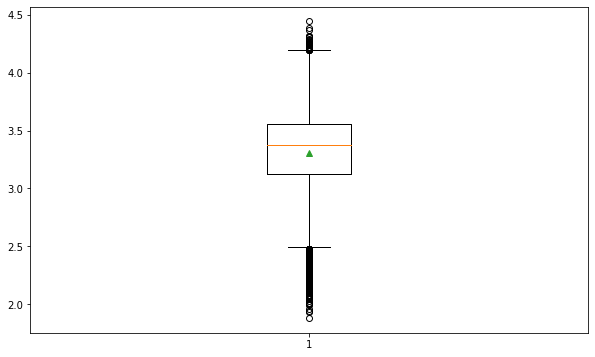

In [72]:
# High School GPA Box Plot
plt.boxplot(Admissions_FinancialAid.HighSchoolGPAUse, showmeans = True)
plt.show()
#plt.rcParams['figure.figsize'] = [10,6]

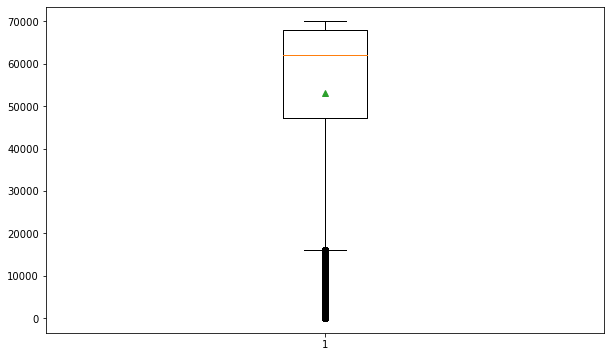

In [73]:
# Estimated Financial Need Box Plot
plt.boxplot(Admissions_FinancialAid.FinancialNeedUse, showmeans = True)
plt.show()
plt.rcParams['figure.figsize'] = [10,6]

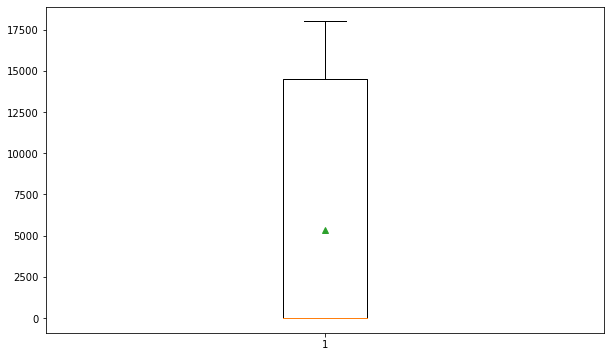

In [74]:
# Aid Merit Based Box Plot
plt.boxplot(Admissions_FinancialAid.AidMeritBased, showmeans = True)
plt.show()
plt.rcParams['figure.figsize'] = [10,6]

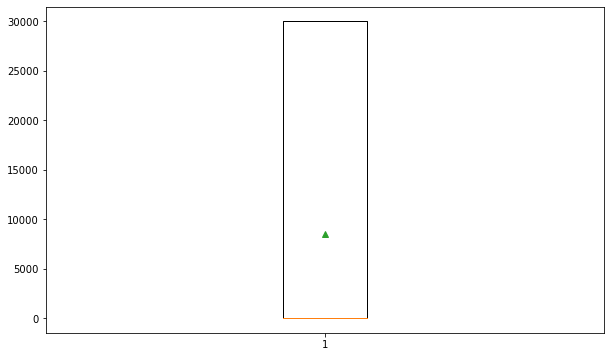

In [75]:
# Aid Merit Based Box Plot
plt.boxplot(Admissions_FinancialAid.AidNeedBased, showmeans = True)
plt.show()
plt.rcParams['figure.figsize'] = [10,6]

### Heatmap

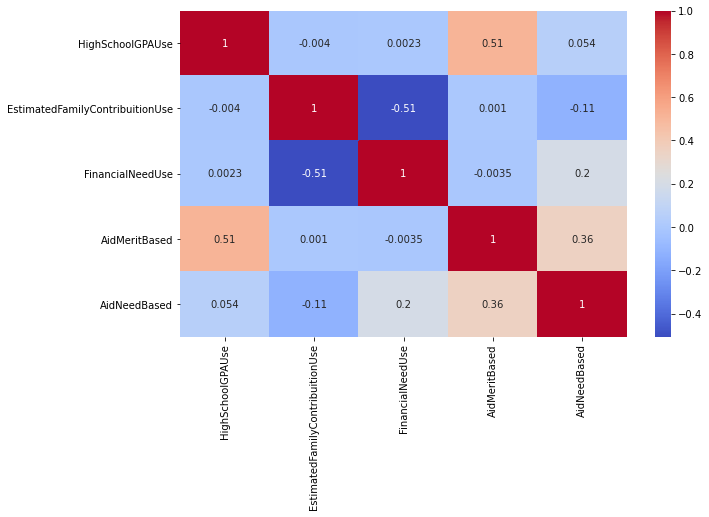

In [76]:
#Heatmap can only be used for continuous variables
heatmaptable=Admissions_FinancialAid[['HighSchoolGPAUse', 'EstimatedFamilyContribuitionUse', 
                                    'FinancialNeedUse', 'AidMeritBased', 'AidNeedBased']]
heatmaptable.head()
heatmaptable.corr()
plt.figure(figsize=(10,6))
sns.heatmap(heatmaptable.corr(), annot = True, cmap = 'coolwarm')